In [18]:
import HOdata
easinds=HOdata.alleas

outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/"
fh = 'ind_A_v13_TBH5'
outmost="Mbuti"
for myreg2 in ["Onge"]+easinds:
    subset = 'targetXEAS_CTY_A%s_E%s' % (myreg2,outmost)
    myfile=open(outpd+fh+".f4."+subset+".log",'r')
    for line in myfile: 
        if "result:" not in line: continue
        x=line.split()
        if float(x[10]) >= 1 or float(x[10]) <=0: continue
        else: print "%s\t%s\t%s\t%.2f" % (x[1],x[3],x[8],1-float(x[10]))
    break

Onge	Mongola	Daur	0.02
Onge	Tibetan_Gangcha	Daur	0.00
Onge	Tibetan_Gannan	Daur	0.14
Onge	Tibetan_Xunhua	Daur	0.09
Onge	Tu	Daur	0.12
Onge	Dongxiang	Daur	0.28
Onge	Mongol	Daur	0.51
Onge	Burmese	Daur	0.05
Onge	Bonan	Daur	0.18
Onge	Yugur_Western	Daur	0.07
Onge	Salar	Daur	0.43
Onge	Malayan	Daur	0.80
Onge	Mebrak	Daur	0.31
Onge	Samdzong	Daur	0.03
Onge	Boisman_MN	Daur	0.01
Onge	XianShang	Daur	0.09
Onge	Zongri	Daur	0.14
Onge	Wuba	Daur	0.09
Onge	Xiaoshuangqiao	Daur	0.07
Onge	Guandimiao	Daur	0.39
Onge	Muzhuzhuliang	Daur	0.21
Onge	Xinhua	Daur	0.01
Onge	Wuzhuangguo	Daur	0.16
Onge	Shimao	Daur	0.13
Onge	Tonglin	Daur	0.44
Onge	Longlin	Daur	0.53
Onge	Bbdong	Daur	0.04
Onge	Xinyi	Daur	0.13
Onge	Pukagongma	Daur	0.44
Onge	Redilong	Daur	0.03
Onge	Butaxiongqu	Daur	0.19
Onge	Gelintang	Daur	0.45
Onge	Yingpanshan	Daur	0.11
Onge	Mougou	Daur	0.25
Onge	Sanheyi	Daur	0.10
Onge	Yusu	Daur	0.05
Onge	Daur	Hezhen	0.09
Onge	Mongola	Hezhen	0.10
Onge	Xibo	Hezhen	0.08
Onge	Tibetan_Chamdo	Hezhen	0.01
Onge	Tibetan_Gangcha	Hezh

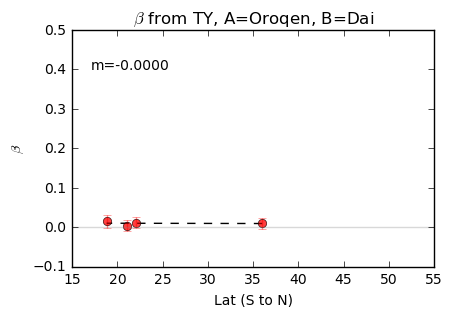

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
import HOdata
import numpy as np
easinds=HOdata.alleas

outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/"
potentialadmixed=["Bonan","Burmese","Cambodian","Daur","Dongxiang","Kazakh",
                 "Kazakh_China","Kyrgyz","Kyrgyz_China","Malay","Malayan",
                 "Mongol","Salar","Thai","Uygur","Yugur_Eastern","Mongola"]
tibetans=['Qiang_Horpa','Tibetan_Chamdo','Tibetan_Gangcha','Tibetan_Gannan',
          'Tibetan_Lhasa',"Yi",'Tibetan_Nagqu','Tibetan_Shannan',
          'Tibetan_Shigatse','Tibetan_Xinlong','Tibetan_Xunhua','Tibetan_Yajiang',
        'Tibetan_Yunnan','Yugur_Eastern','Yugur_Western']
latlongfile=open("/home/mel_yang/projects/bronzeage/f3stats/F3.HOPD.map",'r')
#mylat={}
#for line in latlongfile: 
#    x=line.split()
#    mylat[x[0]] = float(x[1])
#latlongfile.close()

mylats=[(line.split()[0],float(line.split()[1])) for line in latlongfile]
#print mylats  
mylats= sorted(mylats, key=lambda x: (x[1]))[::-1]
pops=[i[0] for i in mylats]
mysasn="Maonan"
fh = 'ind_A_v13_TBH5'
outmost="Mbuti"
admixsource="UstIshim"
admixsource="TY"
fig = plt.figure(figsize=(20,35))
num=0
for mysasn in ["Dai"]: #pops:
    if mysasn in potentialadmixed: continue
    if mysasn in tibetans: continue
    
    mydats=[]
    for myreg2 in ["Oroqen"]: #["Onge"]+easinds:
        subset = 'targetXEAS_C%s_A%s_E%s' % (admixsource,myreg2,outmost)
        myfile=open(outpd+fh+".f4."+subset+".log",'r')
        for line in myfile: 
            if "result:" not in line: continue
            x=line.split()
            if x[3] not in pops: continue 
            if x[3] in potentialadmixed: continue
            if x[3] in tibetans: continue
            if x[8] != mysasn: continue
            
            if float(x[10]) >= 1 or float(x[10]) <=0: continue
            else: 
                ##print "%s\t%s\t%s\t%.2f\t%.3f" % (x[1],x[3],x[8],1-float(x[10]), float(x[11]))
                mydats.append((x[3],1-float(x[10]), float(x[11]),mylats[pops.index(x[3])][1]))
        break
    mydats= sorted(mydats, key=lambda x: (x[3]))[::-1]
    xs1=[dat[3] for dat in mydats]
    ys1=[dat[1] for dat in mydats]
    se =[dat[2] for dat in mydats]
    num += 1
    ax1=fig.add_subplot(12,5,num)
    ax1.plot(xs1,ys1,'ro',alpha=0.5)
    fit = np.polyfit(xs1,ys1,1)
    
    fit_fn = np.poly1d(fit) 
    newys1=fit_fn(xs1)
    ax1.plot(xs1, newys1, '--',color="black")
    m = (newys1[-1]-newys1[0])/(xs1[-1]-xs1[0])
    ax1.errorbar(xs1, ys1, yerr=se, fmt='ro',alpha=0.5)
    ax1.set_ylim(-0.1,0.5)
    ax1.set_xlim(15,55)
    #ax1.set_xlim(48000,-2500)
    ax1.set_xlabel('Lat (S to N)')
    ax1.set_ylabel(r'$ \beta $')

    plt.title(r'$ \beta $ from %s, A=%s, B=%s' % (admixsource,myreg2,mysasn))
    ax1.axhline(y=0, ls='solid', c='grey',alpha=0.3)
    ax1.text(17,0.4,"m=%.4f" % m)
plt.tight_layout()
fig.savefig(outpd+"images/f4vslat.C_"+admixsource+".B_"+mysasn+".A_"+myreg2+".png", bbox_inches='tight')
#plt.close()

In [3]:
%%writefile /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_Q116.py
##also do several SGDP indivs!
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE

#pD = '/mnt/solexa/mel_yang/bronzeage/data/' #ivpp
#outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/" #ivpp
pD="/home/melinda_yang/data/HO_bronzeage/" #mpi
outpd="/home/melinda_yang/projects/bronzeage/f4ratio/" #mpi

fh = 'ind_A_v13_TBH5'
E="Mbuti"
Xs=['UstIshim','Oase1','Kostenki14','GoyetQ116-1','Cioclovina1','Kostenki12','Muierii2',
       'Vestonice13','Vestonice15','Vestonice14','Vestonice43','Pavlov1','Vestonice16',
       'Paglicci133','KremsWA3','Ostuni2','Ostuni1','Paglicci108','GoyetQ53-1',
       'GoyetQ376-19','GoyetQ56-16','Malta1','ElMiron','AfontovaGora2.SG','AfontovaGora3',
       'HohleFels79','HohleFels49','Rigney1','GoyetQ-2','Brillenhohle','Burkhardtshohle',
       'Villabruna','Bichon','Satsurblia','Rochedane','Continenza','Iboussieres39','Ranchot88',
       'LesCloseaux13','Kotias','Falkenstein','Bockstein','Ofnet','Chaudardes1','Loschbour',
       'LaBrana1','Koros_Hungary_EN_HG.SG','BerryAuBac','Motala_HG','Karelia','Stuttgart','LaRochette']
A,C=("Kostenki14","Tianyuan")
Bs=Xs

subset = 'targetXQ116_C%s_A%s_E%s' % (C,A,E)
ABCs = [(A,B,C) for B in Bs if B not in [A,C]]
out = [E]
pm.f4runitall(ABCs, Xs, out, pD, fh, subset,outpd=outpd)

Writing /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_Q116.py


In [4]:
%%writefile /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_TY.py
##also do several SGDP indivs!
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE

#pD = '/mnt/solexa/mel_yang/bronzeage/data/' #ivpp
#outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/" #ivpp
pD="/home/melinda_yang/data/HO_bronzeage/" #mpi
outpd="/home/melinda_yang/projects/bronzeage/f4ratio/" #mpi

fh = 'ind_A_v13_TBH5'
E="Mbuti"
Cs=['Daur', 'Hezhen', 'Mongola', 'Naxi', 'Oroqen', 'Ulchi', 'Xibo', 'Dai', 'Dong', 'Gelao', 'Lahu', 'Li', 'Maonan', 'Miao', 'Mulam', 'She', 'Tujia', 'Yi', 'Zhuang', 'Cambodian', 'Han_Chongqing', 'Han_Fujian', 'Han_Guandong', 'Han_Henan', 'Han_HGDP', 'Han_Hubei', 'Han_Jiangsu', 'Han_NChina', 'Han_Shandong', 'Han_Shanghai', 'Han_Shanxi', 'Han_Sichuan', 'Han_Zhejiang', 'Kinh_Vietnam_KHV', 'Korean', 'Thai', 'Qiang_Horpa', 'Tibetan_Chamdo', 'Tibetan_Gangcha', 'Tibetan_Gannan', 'Tibetan_Lhasa', 'Tibetan_Nagqu', 'Tibetan_Shannan', 'Tibetan_Shigatse', 'Tibetan_Xinlong', 'Tibetan_Xunhua', 'Tibetan_Yajiang', 'Japanese', 'Ami_Stoneking', 'Atayal_Stoneking', 'Tu', 'Dongxiang', 'Kyrgyz_China', 'Kyrgyz', 'Kazakh_China', 'Kazakh', 'Uygur', 'Mongol', 'Tibetan_Yunnan', 'Bunun', 'Tao', 'Burmese', 'Vietnamese', 'Paiwan', 'Rukai', 'Hakka', 'Minnan', 'Pingpu', 'Atayal_Coriell', 'Ami_Coriell', 'Bonan', 'Yugur_Eastern', 'Yugur_Western', 'Salar', 'Malay', 'Malayan', 'Chokhopani', 'Mebrak', 'Samdzong', 'Boisman_MN', 'Tianyuan', 'Boshan', 'Donghuigou', 'Balikun', 'Zhougongmiao', 'Yaojia', 'Linzi', 'XianShang', 'Zongri', 'Huoshaogou', 'Wuba', 'Xiaoshuangqiao', 'Guandimiao', 'Shengedaliang', 'Muzhuzhuliang', 'Xinhua', 'Wuzhuangguo', 'Shimao', 'Tonglin', 'Dashuitian', 'Longlin', 'Bbdong', 'Taosi', 'Xinyi', 'Pukagongma', 'Redilong', 'Butaxiongqu', 'Gelintang', 'Yingpanshan', 'Mougou', 'Sanheyi', 'Yusu', 'Jinchankou', 'Jomon']
A,B=("Kostenki14","GoyetQ116-1")
Xs=["Tianyuan"]

subset = 'targetXQ116_B%s_A%s_E%s' % (B,A,E)
ABCs = [(A,B,C) for C in Cs if C not in [A,B]]
out = [E]
pm.f4runitall(ABCs, Xs, out, pD, fh, subset,outpd=outpd)

Writing /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_TY.py


In [2]:
%%writefile /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_EURtoEAS.py
##also do several SGDP indivs!
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
easinds=HOdata.alleas+HOdata.eur
outmost="Mbuti"
pD = '/mnt/solexa/mel_yang/bronzeage/data/'
outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/"
fh = 'ind_A_v13_TBH5'
A="Kostenki14"
C="Tianyuan"
Bs=["ElMiron","Vestonice16"]
for B in ["Kostenki14"]: #["Onge"]+easinds:
    subset = 'targetXEASEUR_C%s_A%s_E%s' % (C,A,outmost)
    Xs = easinds
    ABCs = [(A,B,C) for B in Bs if B not in [A,C]]
    out = [outmost]
    pm.f4runitall(ABCs, Xs, out, pD, fh, subset,outpd=outpd)

Overwriting /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4_EURtoEAS.py


In [110]:
%%writefile /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4TY.py
##also do several SGDP indivs!
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
easinds=HOdata.alleas
outmost="Mbuti"
pD = '/mnt/solexa/mel_yang/bronzeage/data/'
outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/"
fh = 'ind_A_v13_TBH5'

for myreg2 in ["Mixe","Karitiana","Surui","Pima"]: #["Onge"]+easinds:
    subset = 'targetXEAS_CTY_A%s_E%s' % (myreg2,outmost)
    Xs = easinds
    ABCs = [(myreg2,myreg1,'Tianyuan') for myreg1 in easinds if myreg1 not in [myreg2,"Tianyuan"]]
    out = [outmost]
    pm.f4runitall(ABCs, Xs, out, pD, fh, subset,outpd=outpd)

Overwriting /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4TY.py


In [86]:
%%writefile /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4K14_Ust.py
##also do several SGDP indivs!
import plotting_funcs as pf
import projmodules as pm
from subprocess import Popen, PIPE
import HOdata
easinds=HOdata.alleas
outmost="Mbuti"
pD = '/mnt/solexa/mel_yang/bronzeage/data/'
outpd="/mnt/solexa/mel_yang/bronzeage/f4ratio/"
fh = 'ind_A_v13_TBH5'
myC="Vestonice16"
myC="Sardinian"
myC="Boshan"
for myreg2 in ["Onge"]: #+easinds:
    subset = 'targetXEAS_C%s_A%s_E%s' % (myC,myreg2,outmost)
    Xs = easinds
    ABCs = [(myreg2,myreg1,myC) for myreg1 in easinds if myreg1 not in [myreg2,myC]]
    out = [outmost]
    pm.f4runitall(ABCs, Xs, out, pD, fh, subset,outpd=outpd)

Overwriting /mnt/solexa/mel_yang/bronzeage/f4ratio/calcf4K14_Ust.py
